In [2]:
N=2
G=6.67e-11
#1.5倍太阳质量
M=2.9835e30
R0=1e7
c=3e8
# v0=3.1554e6/np.sqrt(2)

5*c**5*R0**4/(4*256*G**3*M**3)


15056384.363203643

In [3]:
import cufflinks as cf
import pandas as pd
import plotly.graph_objects as go

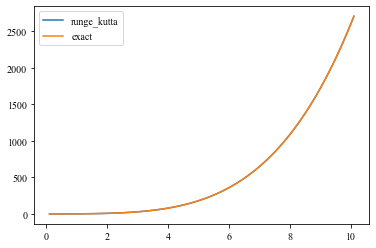

max error 0.00042


In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta(y, x, dx, f):
    """ y is the initial value for y
        x is the initial value for x
        dx is the time step in x
        f is derivative of function y(t)
    """
    k1 = dx * f(y, t)
    k2 = dx * f(y + 0.5 * k1, x + 0.5 * dx)
    k3 = dx * f(y + 0.5 * k2, x + 0.5 * dx)
    k4 = dx * f(y + k3, x + dx)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6.

if __name__=='__main__':
    t = 0.
    y = 1.
    dt = .1
    ys, ts = [], []
    def func(y, t):
        return 2 * t * math.sqrt(y)
    while t <= 10:
        y = runge_kutta(y, t, dt, func)
        t += dt
        ys.append(y)
        ts.append(t)

    exact = [(t ** 2 + 2) ** 2 / 4. for t in ts]
    plt.plot(ts, ys, label='runge_kutta')
    plt.plot(ts, exact, label='exact')
    plt.legend()
    plt.show()
    error = np.array(exact) - np.array(ys)
    print("max error {:.5f}".format(max(error)))

In [5]:
e=0.8
a=1e7
E=[]
A=[]
dt=0.2
time=0
T=[]

while (a>10000):
    time+=dt
    a-=(256*G**3*M**3*(1+(73*e**2)/24+(37*e**4)/96)/(5*a**3*c**5*(1-e**2)**3.5))*dt
    e-=152*8*G**3*M**3*e*(1+(121*e**2)/304)/(15*c**5*a**4*(1-e**2)*2.5)*dt
    if(e<0):
        break
    T.append(time)
    A.append(a)
    E.append(e)

In [6]:
time

146153.39999953148

In [7]:
e=0.8
a=1e7

(5*(c**5)*((1-e**2)**3.5)*(a**4))/(512*(G**3)*(M**3)*(1+73*e**2/24+37*e**4/96))

271527.05805044895

<AxesSubplot:xlabel='t/s'>

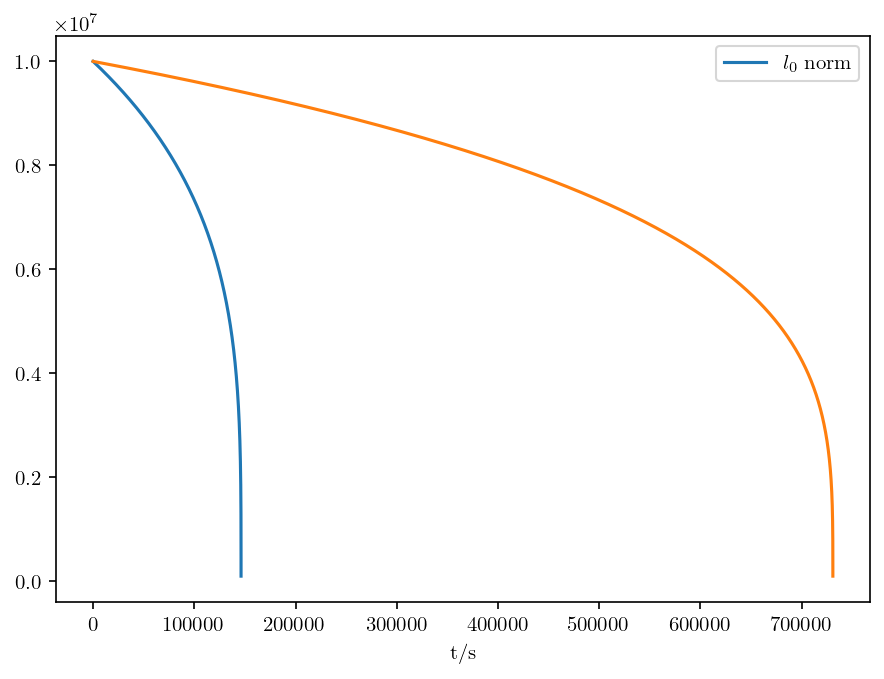

In [8]:
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rc("font",family='Times New Roman')

fig = plt.figure(num=1,figsize=(7,5), facecolor='white',dpi=150)

plt.plot(T,A,label=r"$ l_0 \; \rm{norm}$ ")
# plt.title(r"Lasso 方法")
plt.xlabel("t/s")
plt.legend()
pd.Series(A).plot()

<AxesSubplot:>

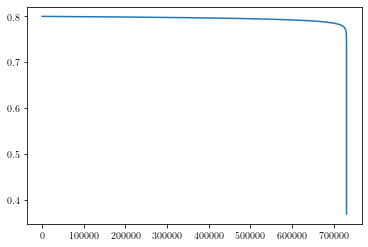

In [9]:
pd.Series(E).plot()

In [10]:
def runge_kutta(y, x, dx, f):
    """ y is the initial value for y
        x is the initial value for x
        dx is the time step in x
        f is derivative of function y(t)
    """
    k1 = dx * f(y, t)
    k2 = dx * f(y + 0.5 * k1, x + 0.5 * dx)
    k3 = dx * f(y + 0.5 * k2, x + 0.5 * dx)
    k4 = dx * f(y + k3, x + dx)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6.

e=0.8
a=1e7
E=[]
A=[]
dt=0.2
time=0
def af(a,t):
    return -32*G**3*M**3*(1+(73*e**2)/24+(37*e**4)/96)/(5*a**3*c**5*(1-e**2)**3.5)
def ef(e,t):
    return -152*G**3*M**3*e*(1+(121*e**2)/304)/(15*c**5*a**4*(1-e**2)*2.5)
while (a>1000):
    time+=dt
    a=runge_kutta(a,time,dt,af)
    e=runge_kutta(e,time,dt,ef)
    A.append(a)
    E.append(e)

In [11]:
# time

In [12]:
dt=10
def get_res(a,e):
    time=0.
    E=[]
    A=[]
    while (a>1000):
        time+=dt
        a-=32*G**3*M**3*(1+(73*e**2)/24+(37*e**4)/96)/(5*a**3*c**5*(1-e**2)**3.5)*dt
        e-=152*G**3*M**3*e*(1+(121*e**2)/304)/(15*c**5*a**4*(1-e**2)*2.5)*dt
        A.append(a)
        E.append(e)
    return time,A,E
ans=[]
N=30
for i in range(N):
    Ri=np.linspace(R0,50*R0,N)[i]
    print(Ri)
    ans.append(get_res(R0,0.5)[0])


10000000.0


TypeError: '>' not supported between instances of 'complex' and 'int'